In [38]:
import matplotlib.pyplot as plt

import numpy as np 
import pandas as pd 
import seaborn as sns

1. Выберите наборы данных. которые можно интерпретировать, как временные ряды:

    а) зависимость цены на недвижимость в конкретном регионе от времени,
    
    б) скорость полета самолета при перелете из аэропорта А в аэропорт В,
    
    в) количество отказов компьютера,
    
    г) число обращений в поликлинику по району,
    
    д) координаты автобуса при движении по маршруту,
    
    е) координаты фигуры нарушителя в файле видеофиксации охранной системы.
    
Следуя определению временного ряда временными рядами можно назвать а, б, д, е. Все эти данные можно измерить через опрделенные промежутки времени и интерпретировать как временной ряд.

2. Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.

In [39]:
data = pd.read_csv('Data/DUQ_hourly.csv', index_col=[0], parse_dates=[0])

In [40]:
data.head()

,DUQ_MW
Datetime,
2005-12-31 01:00:00,1458.0
2005-12-31 02:00:00,1377.0
2005-12-31 03:00:00,1351.0
2005-12-31 04:00:00,1336.0
2005-12-31 05:00:00,1356.0


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
DUQ_MW    119068 non-null float64
dtypes: float64(1)
memory usage: 1.8 MB


In [42]:
data.describe()

,DUQ_MW
count,119068.000000
mean,1658.820296
std,301.740640
min,1014.000000
25%,1444.000000
50%,1630.000000
75%,1819.000000
max,3054.000000


Text(0, 0.5, 'МВт')

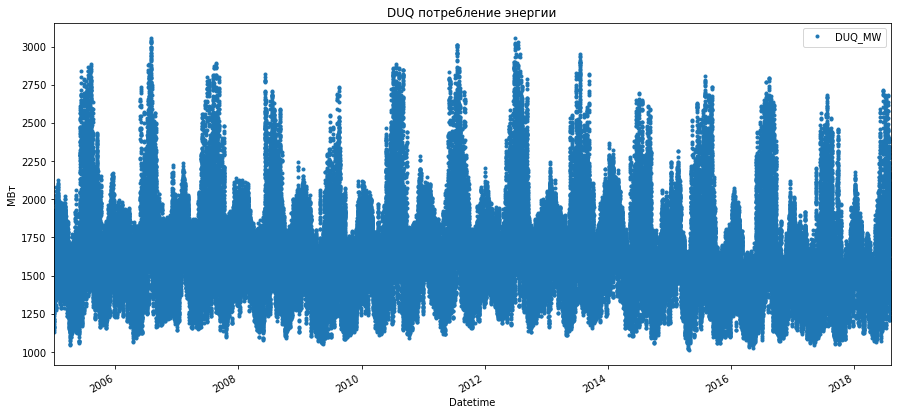

In [43]:
data.plot(style='.', figsize=(15,7), title='DUQ потребление энергии')
plt.ylabel('МВт')

In [44]:
data['date'] = data.index

In [45]:
count_date = data['date'].value_counts().head()
count_date.head(10)

2017-11-05 02:00:00    2
2014-11-02 02:00:00    2
2015-11-01 02:00:00    2
2016-11-06 02:00:00    2
2007-07-15 10:00:00    1
Name: date, dtype: int64

In [46]:
day_h = data['2015-03-01 00:00:00':'2015-03-31 23:00:00'].index.day

day_h_v = day_h.value_counts()
day_h_v[day_h_v != 24]

8    23
Name: Datetime, dtype: int64

In [47]:
data['2015-03-08 00:00:00':'2015-03-08 23:00:00'].index

DatetimeIndex(['2015-03-08 01:00:00', '2015-03-08 02:00:00',
               '2015-03-08 04:00:00', '2015-03-08 05:00:00',
               '2015-03-08 06:00:00', '2015-03-08 07:00:00',
               '2015-03-08 08:00:00', '2015-03-08 09:00:00',
               '2015-03-08 10:00:00', '2015-03-08 11:00:00',
               '2015-03-08 12:00:00', '2015-03-08 13:00:00',
               '2015-03-08 14:00:00', '2015-03-08 15:00:00',
               '2015-03-08 16:00:00', '2015-03-08 17:00:00',
               '2015-03-08 18:00:00', '2015-03-08 19:00:00',
               '2015-03-08 20:00:00', '2015-03-08 21:00:00',
               '2015-03-08 22:00:00', '2015-03-08 23:00:00',
               '2015-03-08 00:00:00'],
              dtype='datetime64[ns]', name='Datetime', freq=None)

Как видно, мы имеем проблему с переходом на летнее\зимнее время. Обработаем пропуски заменив их средним по двум соседним измерениям.

In [48]:
day_h = data['2014-03-01 00:00:00':'2014-03-31 23:00:00'].index.day

day_h_v = day_h.value_counts()
day_h_v[day_h_v != 24]

9    23
Name: Datetime, dtype: int64

In [49]:
day_h = data['2016-03-01 00:00:00':'2016-03-31 23:00:00'].index.day

day_h_v = day_h.value_counts()
day_h_v[day_h_v != 24]

13    23
Name: Datetime, dtype: int64

In [50]:
day_h = data['2017-03-01 00:00:00':'2017-03-31 23:00:00'].index.day

day_h_v = day_h.value_counts()
day_h_v[day_h_v != 24]

12    23
Name: Datetime, dtype: int64

In [51]:
x1 = (data['2017-03-12 02:00:00']['DUQ_MW'].values + data['2017-03-12 04:00:00']['DUQ_MW'].values)/2
x2 = (data['2016-03-13 02:00:00']['DUQ_MW'].values + data['2016-03-13 04:00:00']['DUQ_MW'].values)/2
x3 = (data['2015-03-08 02:00:00']['DUQ_MW'].values + data['2015-03-08 04:00:00']['DUQ_MW'].values)/2
x4 = (data['2014-03-09 02:00:00']['DUQ_MW'].values + data['2014-03-09 04:00:00']['DUQ_MW'].values)/2

x = np.reshape([x1,x2,x3,x4], (4,1))

new_data = pd.DataFrame(index=pd.to_datetime(pd.Series(['2017-03-12 03:00:00', '2016-03-13 03:00:00', '2015-03-08 03:00:00', '2014-03-09 03:00:00'])), columns=['DUQ_MW'], data=x)
new_data['date'] = new_data.index

new_data.head()

,DUQ_MW,date
2017-03-12 03:00:00,1454.0,2017-03-12 03:00:00
2016-03-13 03:00:00,1111.5,2016-03-13 03:00:00
2015-03-08 03:00:00,1394.5,2015-03-08 03:00:00
2014-03-09 03:00:00,1415.0,2014-03-09 03:00:00


In [52]:
data = data.append(new_data, sort=False)
data.tail()

,DUQ_MW,date
2018-01-02 00:00:00,1721.0,2018-01-02 00:00:00
2017-03-12 03:00:00,1454.0,2017-03-12 03:00:00
2016-03-13 03:00:00,1111.5,2016-03-13 03:00:00
2015-03-08 03:00:00,1394.5,2015-03-08 03:00:00
2014-03-09 03:00:00,1415.0,2014-03-09 03:00:00


Теперь уберем дублирующие значения.

In [60]:
df = data.loc[count_date.iloc[:4].index].groupby(by='date').mean()
df['date'] = df.index
data.drop(count_date.iloc[:4].index)
data = data.append(df)
data.tail()

,DUQ_MW,date
2014-03-09 03:00:00,1415.0,2014-03-09 03:00:00
2014-11-02 02:00:00,1256.0,2014-11-02 02:00:00
2015-11-01 02:00:00,1125.5,2015-11-01 02:00:00
2016-11-06 02:00:00,1114.0,2016-11-06 02:00:00
2017-11-05 02:00:00,1118.0,2017-11-05 02:00:00


отсортируем индексы для корректного построения графиков.

In [61]:
data = data.sort_index()

Text(0.5, 0, 'номер дня')

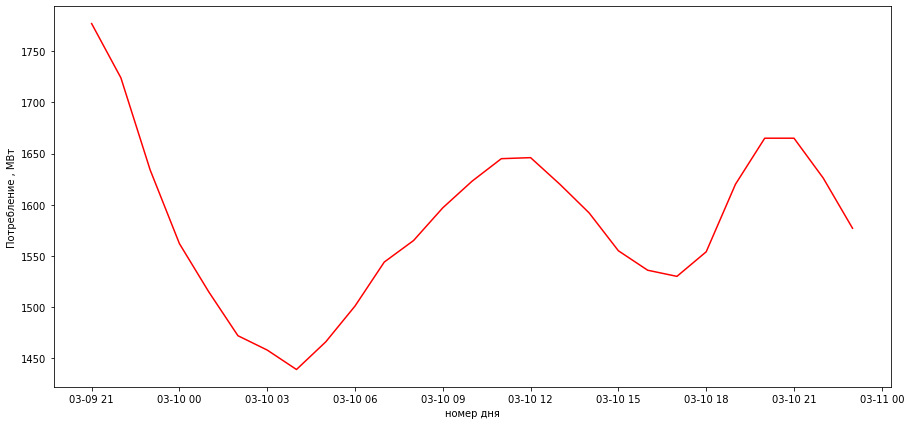

In [64]:
plt.figure(figsize=(15,7))
plt.plot(data['2012-03-09 21:00:00':'2012-03-10 23:00:00'].index,data['2012-03-09 21:00:00':'2012-03-10 23:00:00']['DUQ_MW'].values, 'r')
plt.ylabel('Потребление , МВт')
plt.xlabel('номер дня')

3. Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам.

In [67]:
brent_data = pd.read_excel('Data/brent-2010-2019.xlsx', index_col=[0], parse_dates=[0])

In [68]:
brent_data.head()

,Значение
Дата,
2019-09-01,58.84
2019-08-30,59.19
2019-08-29,60.37
2019-08-28,59.84
2019-08-27,59.59


In [79]:
brent_weekly = brent_data.resample('W').mean()
brent_weekly.head()

,Значение
Дата,
2010-09-05,76.616000
2010-09-12,77.673333
2010-09-19,78.693333
2010-09-26,78.518333
2010-10-03,81.211667


In [80]:
brent_month = brent_data.resample('M').mean()
brent_month.head()

,Значение
Дата,
2010-09-30,78.228148
2010-10-31,83.473462
2010-11-30,86.178077
2010-12-31,92.232308
2011-01-31,97.033200


4. Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent.

In [82]:
brent_year = brent_data.resample('Y').mean()
brent_year.head()

,Значение
Дата,
2010-12-31,84.963238
2011-12-31,110.758746
2012-12-31,111.377484
2013-12-31,108.137114
2014-12-31,99.435493


In [87]:
brent_weekly_std = brent_data.resample('W').std()
brent_month_std = brent_data.resample('M').std()
brent_year_std = brent_data.resample('Y').std()

Text(0.5, 0, 'Дата')

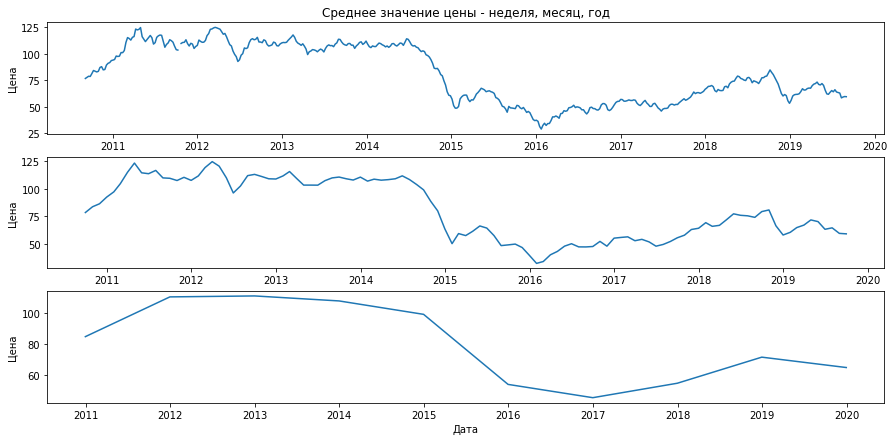

In [95]:
plt.figure(figsize=(15,7))

plt.subplot(3,1,1)
plt.plot(brent_weekly.index, brent_weekly.values)
plt.ylabel('Цена')
plt.title('Среднее значение цены - неделя, месяц, год')

plt.subplot(3,1,2)
plt.plot(brent_month.index, brent_month.values)
plt.ylabel('Цена')

plt.subplot(3,1,3)
plt.plot(brent_year.index, brent_year.values)
plt.ylabel('Цена')
plt.xlabel('Дата')

Text(0.5, 0, 'Дата')

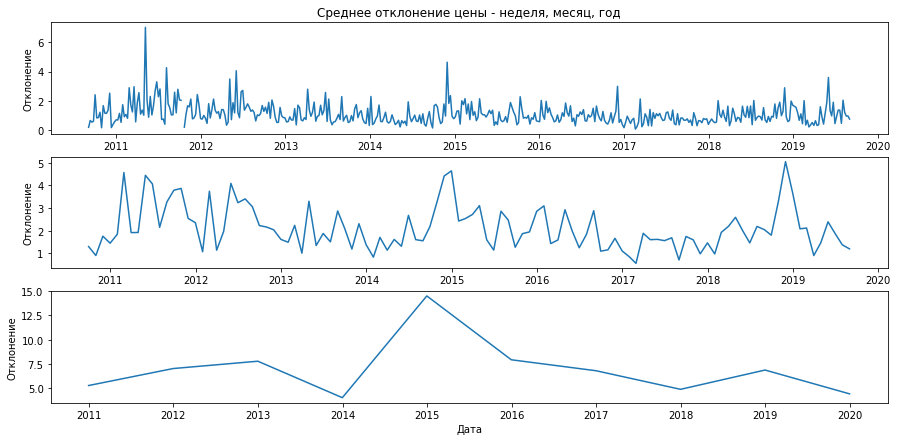

In [97]:
plt.figure(figsize=(15,7))

plt.subplot(3,1,1)
plt.plot(brent_weekly_std.index, brent_weekly_std.values)
plt.ylabel('Отклонение')
plt.title('Среднее отклонение цены - неделя, месяц, год')

plt.subplot(3,1,2)
plt.plot(brent_month_std.index, brent_month_std.values)
plt.ylabel('Отклонение')

plt.subplot(3,1,3)
plt.plot(brent_year_std.index, brent_year_std.values)
plt.ylabel('Отклонение')
plt.xlabel('Дата')

5. Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с годовым.

На недельных и месячных графиках мы более отчетливо видим колебания цен, нежели на годовом.